# Imports

In [1]:
import os

import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.distributions import MultivariateNormal, Normal, Cauchy, Chi2
import torch.autograd as autograd

from torch.utils.data.dataset import Dataset
from torch.nn.init import xavier_normal_ as xavier_normal_

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
path_to_notebook = os.path.join(os.getcwd())
path_to_notebook_api = os.path.join(path_to_notebook, 'api')

sys.path.append(path_to_notebook_api)

In [3]:
from fgan import fgan

# Optimization of TV-GAN for big difference between true distribution and contamination set, initialization $\eta_{init} = \eta_{true}$

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = fgan(p=1, eps=0.2, device=device, tol=1e-5)

In [19]:
cont_mean = 10.0
f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
            true_mean=1.0,
            cont_mean=cont_mean, cont_var=1.)

In [20]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
f.data_init(train_size=50000, batch_size=500)

In [21]:
(f.Xtr > 5).sum()/f.Xtr.shape[0]

tensor(0.2009)

In [26]:
init_eta = f.true_mean
init_weights = None
f.net_init(d_hidden_units=[], 
           use_logistic_regression=True,
           init_weights=init_weights,
           init_eta=init_eta,
           use_median_init_G=False,
           elliptical=False, 
           g_input_dim=10, g_hidden_units=[10, 10],
           activation_D1='Sigmoid', verbose=True)

Initialize Mean Error: 0.0000


In [27]:
f.netG.bias.data

tensor([1.])

In [28]:
f.netD.layer_list[0].weight

Parameter containing:
tensor([[0.2653]], requires_grad=True)

In [29]:
f.netD.layer_list[0].bias

Parameter containing:
tensor([0.], requires_grad=True)

In [30]:
f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')

In [31]:
f.fit(floss='tv', epochs=100, avg_epochs=25, verbose=50)

Epoch:50, LossD/G:-0.2003/-0.0003, Error(Mean):2.0097
Epoch:100, LossD/G:0.0000/-0.0000, Error(Mean):8.8671


Avg error: 8.8642, Last error: 8.8671
True mean = 1.0000
Contamination mean = 10.0000
Result mean = 9.8671
Grand mean = 2.8000


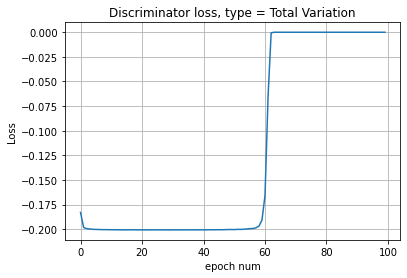

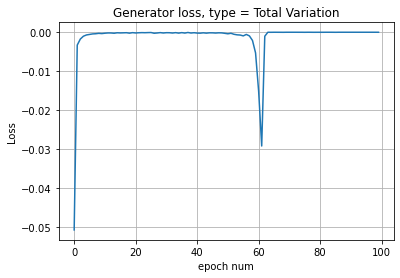

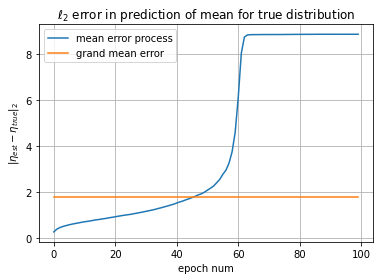

/usr/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


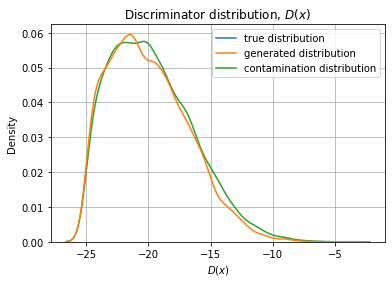

In [32]:
f.report_results()

In [33]:
f.report_results(figsize = (7, 4),
                 show_plots=False,
                 save_d_loss='d_loss_dim_1_tv_true_init_big_contam.pdf',
                 save_g_loss='g_loss_dim_1_tv_true_init_big_contam.pdf',
                 save_error='error_dim_1_tv_true_init_big_contam.pdf',
                 save_distribution='discriminator_distr_dim_1_tv_true_init_big_contam.pdf'
                 )

Avg error: 8.8642, Last error: 8.8671
True mean = 1.0000
Contamination mean = 10.0000
Result mean = 9.8671
Grand mean = 2.8000


/usr/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


# Optimization of TV-GAN for small difference between true distribution and contamination set, initialization $\eta_{init} = \eta_{true}$

In [41]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = fgan(p=1, eps=0.2, device=device, tol=1e-5)
cont_mean=1.5
f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
            true_mean=1.0,
            cont_mean=cont_mean, cont_var=1.)
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
f.data_init(train_size=50000, batch_size=500)
init_weights = None
init_eta = f.true_mean
f.net_init(d_hidden_units=[], 
           use_logistic_regression=True,
           init_weights=init_weights,
           init_eta=init_eta,
           use_median_init_G=False,
           elliptical=False, 
           g_input_dim=10, g_hidden_units=[10, 10],
           activation_D1='Sigmoid', verbose=True)
f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
f.fit(floss='tv', epochs=100, avg_epochs=25, verbose=50)

Initialize Mean Error: 0.0000
Epoch:50, LossD/G:0.0000/-0.0000, Error(Mean):0.5864
Epoch:100, LossD/G:-0.0000/-0.0000, Error(Mean):0.5865


Avg error: 0.5865, Last error: 0.5865
True mean = 1.0000
Contamination mean = 1.5000
Result mean = 0.4135
Grand mean = 1.1000


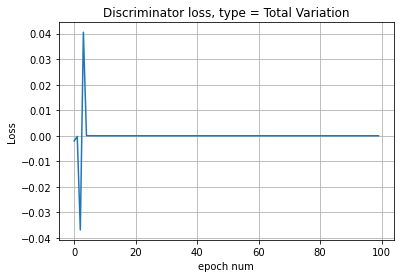

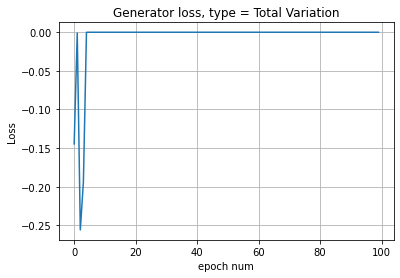

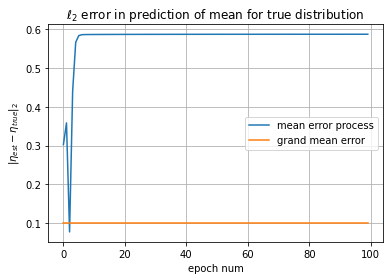

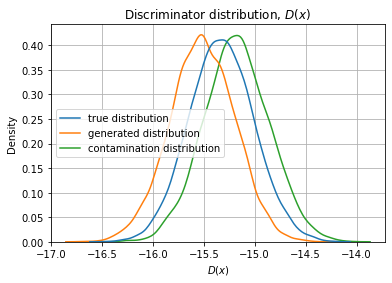

In [42]:
f.report_results()

In [43]:
f.report_results(figsize = (7, 4),
                 show_plots=False,
                 save_d_loss='d_loss_dim_1_tv_true_init_small_contam.pdf',
                 save_g_loss='g_loss_dim_1_tv_true_init_small_contam.pdf',
                 save_error='error_dim_1_tv_true_init_small_contam.pdf',
                 save_distribution='discriminator_distr_dim_1_tv_true_init_small_contam.pdf'
                 )

Avg error: 0.5865, Last error: 0.5865
True mean = 1.0000
Contamination mean = 1.5000
Result mean = 0.4135
Grand mean = 1.1000


# Optimization of TV-GAN for small difference between true distribution and contamination set, initialization $\eta_{init} = \eta_{true}$ with Xavier for weights

In [507]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = fgan(p=1, eps=0.2, device=device, tol=1e-5)
cont_mean=1.5
f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
            true_mean=1.0,
            cont_mean=cont_mean, cont_var=1.)
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
f.data_init(train_size=50000, batch_size=500)
init_weights = None
init_eta = f.true_mean
f.net_init(d_hidden_units=[], 
           use_logistic_regression=True,
           init_weights=init_weights,
           init_eta=init_eta,
           use_median_init_G=False,
           elliptical=False, 
           g_input_dim=10, g_hidden_units=[10, 10],
           activation_D1='Sigmoid', verbose=True)
f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
f.fit(floss='tv', epochs=100, avg_epochs=25, verbose=50)

Initialize Mean Error: 0.0000
Epoch:50, LossD/G:0.0000/-0.0000, Error(Mean):0.5864
Epoch:100, LossD/G:-0.0000/-0.0000, Error(Mean):0.5865


Avg error: 0.5865, Last error: 0.5865
True mean = 1.0000
Contamination mean = 1.5000
Result mean = 0.4135
Grand mean = 1.1000


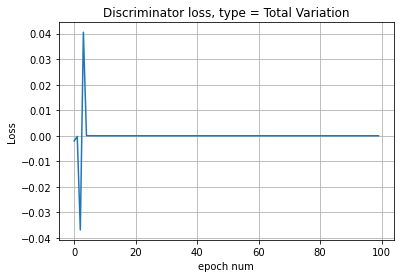

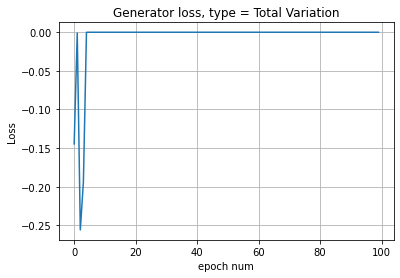

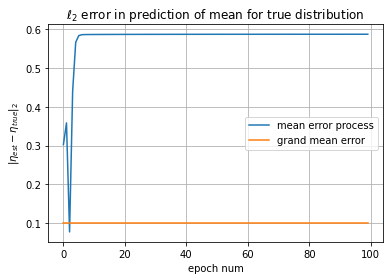

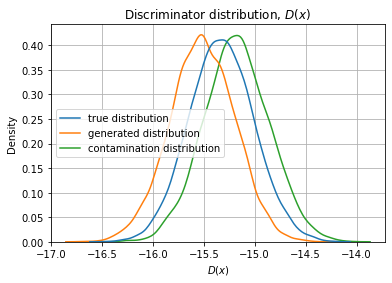

In [508]:
f.report_results()

# Optimization of TV-GAN for big difference between true distribution and contamination set, initialization $\eta_{init} < \eta_{true}$

Initialize Mean Error: 3.0000
Epoch:50, LossD/G:-0.2008/-0.0000, Error(Mean):0.1784
Epoch:100, LossD/G:-0.2009/-0.0001, Error(Mean):0.2022
Avg error: 0.1967, Last error: 0.2022
True mean = 1.0000
Contamination mean = 10.0000
Result mean = 1.2022
Grand mean = 2.8000


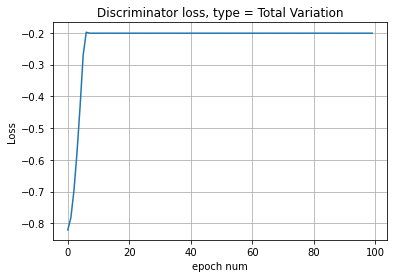

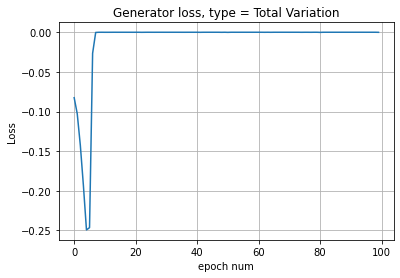

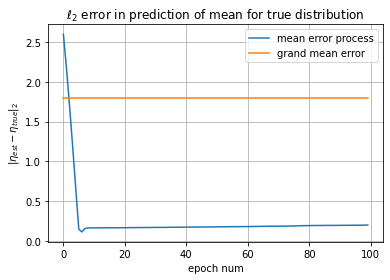

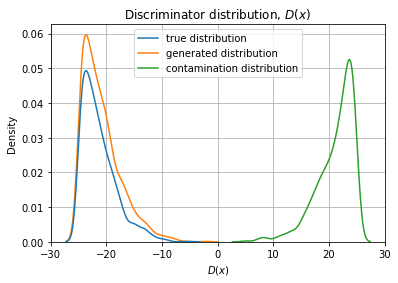

In [468]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = fgan(p=1, eps=0.2, device=device, tol=1e-5)
cont_mean=10.0
f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
            true_mean=1.0,
            cont_mean=cont_mean, cont_var=1.)
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
f.data_init(train_size=50000, batch_size=500)
init_weights=1.0
init_eta = -2.0
f.net_init(d_hidden_units=[], 
           use_logistic_regression=True,
           init_weights=init_weights,
           init_eta=init_eta,
           use_median_init_G=False,
           elliptical=False, 
           g_input_dim=10, g_hidden_units=[10, 10],
           activation_D1='Sigmoid', verbose=True)
f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
f.fit(floss='tv', epochs=100, avg_epochs=25, verbose=50)
f.report_results()

In [469]:
f.report_results(figsize = (7, 4),
                 show_plots=False,
                 save_d_loss='d_loss_dim_1_tv_negative_init_big_contam.pdf',
                 save_g_loss='g_loss_dim_1_tv_negative_init_big_contam.pdf',
                 save_error='error_dim_1_tv_negative_init_big_contam.pdf',
                 save_distribution='discriminator_distr_dim_1_tv_negative_init_big_contam.pdf'
                 )

Avg error: 0.1967, Last error: 0.2022
True mean = 1.0000
Contamination mean = 10.0000
Result mean = 1.2022
Grand mean = 2.8000


# Optimization of TV-GAN for small difference between true distribution and contamination set, initialization $\eta_{init} < \eta_{true}$

Initialize Mean Error: 3.0000
Epoch:50, LossD/G:0.0000/-0.0000, Error(Mean):0.6289
Epoch:100, LossD/G:0.0000/-0.0000, Error(Mean):0.6290
Avg error: 0.6290, Last error: 0.6290
True mean = 1.0000
Contamination mean = 1.5000
Result mean = 1.6290
Grand mean = 1.1000


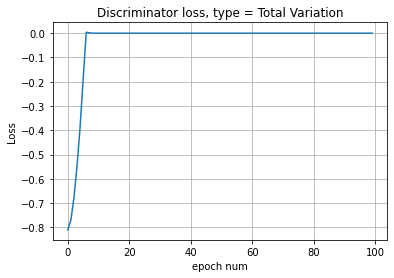

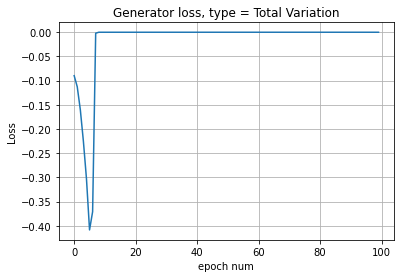

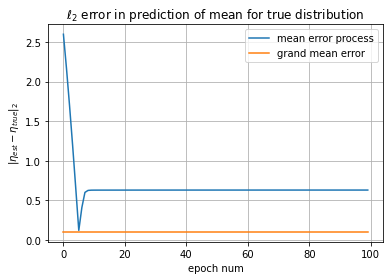

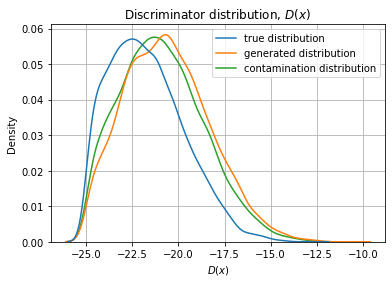

In [470]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = fgan(p=1, eps=0.2, device=device, tol=1e-5)
cont_mean=1.5
f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
            true_mean=1.0,
            cont_mean=cont_mean, cont_var=1.)
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
f.data_init(train_size=50000, batch_size=500)
init_weights=1.0
init_eta = -2.0
f.net_init(d_hidden_units=[], 
           use_logistic_regression=True,
           init_weights=init_weights,
           init_eta=init_eta,
           use_median_init_G=False,
           elliptical=False, 
           g_input_dim=10, g_hidden_units=[10, 10],
           activation_D1='Sigmoid', verbose=True)
f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
f.fit(floss='tv', epochs=100, avg_epochs=25, verbose=50)
f.report_results()

In [471]:
f.report_results(figsize = (7, 4),
                 show_plots=False,
                 save_d_loss='d_loss_dim_1_tv_negative_init_small_contam.pdf',
                 save_g_loss='g_loss_dim_1_tv_negative_init_small_contam.pdf',
                 save_error='error_dim_1_tv_negative_init_small_contam.pdf',
                 save_distribution='discriminator_distr_dim_1_tv_negative_init_small_contam.pdf'
                 )

Avg error: 0.6290, Last error: 0.6290
True mean = 1.0000
Contamination mean = 1.5000
Result mean = 1.6290
Grand mean = 1.1000


# Optimization of TV-GAN for big difference between true distribution and contamination set, initialization $\eta_{init} > \eta_{true}$

Initialize Mean Error: 2.0000
Epoch:50, LossD/G:0.0000/-0.0000, Error(Mean):0.5693
Epoch:100, LossD/G:0.0000/-0.0000, Error(Mean):0.5697
Avg error: 0.5696, Last error: 0.5697
True mean = 1.0000
Contamination mean = 10.0000
Result mean = 0.4303
Grand mean = 2.8000


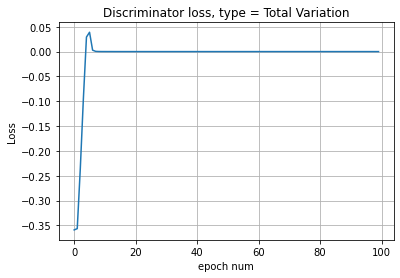

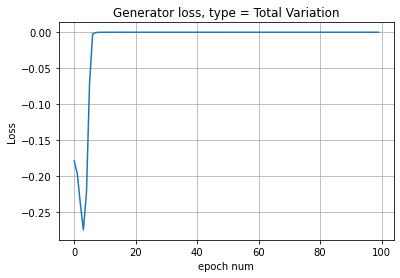

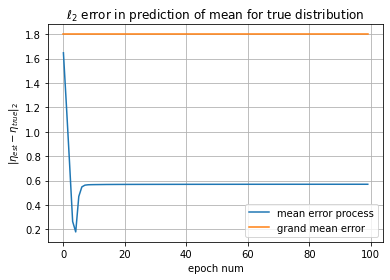

/usr/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


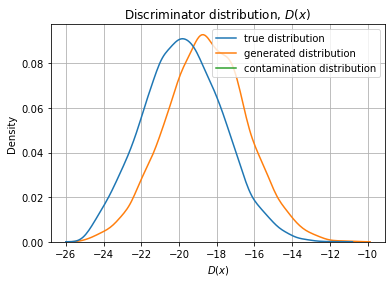

In [474]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = fgan(p=1, eps=0.2, device=device, tol=1e-5)
cont_mean=10.0
f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
            true_mean=1.0,
            cont_mean=cont_mean, cont_var=1.)
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
f.data_init(train_size=50000, batch_size=500)
init_weights=1.0
init_eta = 3.0
f.net_init(d_hidden_units=[], 
           use_logistic_regression=True,
           init_weights=init_weights,
           init_eta=init_eta,
           use_median_init_G=False,
           elliptical=False, 
           g_input_dim=10, g_hidden_units=[10, 10],
           activation_D1='Sigmoid', verbose=True)
f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
f.fit(floss='tv', epochs=100, avg_epochs=25, verbose=50)
f.report_results()

# Optimization of TV-GAN for small difference between true distribution and contamination set, initialization $\eta_{init} > \eta_{true}$

Initialize Mean Error: 0.2000
Epoch:50, LossD/G:-0.0000/-0.0000, Error(Mean):0.9579
Epoch:100, LossD/G:-0.0000/-0.0000, Error(Mean):0.9579
Avg error: 0.9579, Last error: 0.9579
True mean = 1.0000
Contamination mean = 1.5000
Result mean = 1.9579
Grand mean = 1.1000


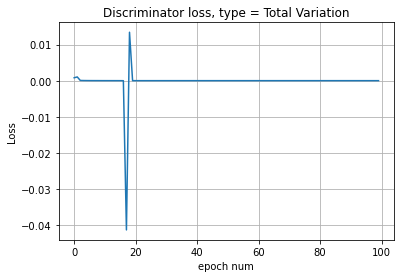

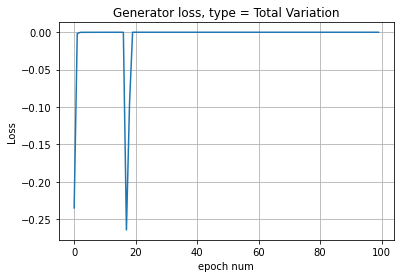

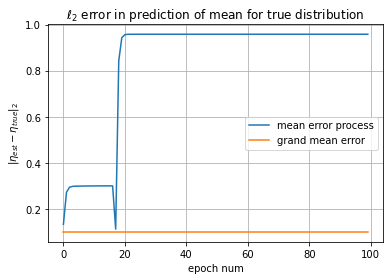

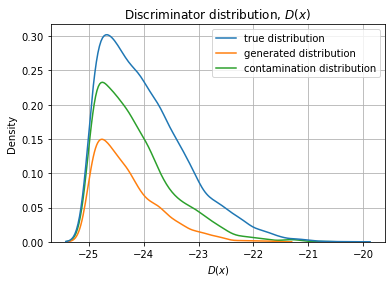

In [472]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = fgan(p=1, eps=0.2, device=device, tol=1e-5)
cont_mean=1.5
f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
            true_mean=1.0,
            cont_mean=cont_mean, cont_var=1.)
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
f.data_init(train_size=50000, batch_size=500)
init_weights=1.0
init_eta = 1.2
f.net_init(d_hidden_units=[], 
           use_logistic_regression=True,
           init_weights=init_weights,
           init_eta=init_eta,
           use_median_init_G=False,
           elliptical=False, 
           g_input_dim=10, g_hidden_units=[10, 10],
           activation_D1='Sigmoid', verbose=True)
f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
f.fit(floss='tv', epochs=100, avg_epochs=25, verbose=50)
f.report_results()

# Optimization of JS-GAN for big difference between true distribution and contamination set, initialization $\eta_{init} = \eta_{true}$

In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = fgan(p=1, eps=0.2, device=device, tol=1e-5)
cont_mean=10.0
f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
            true_mean=1.0,
            cont_mean=cont_mean, cont_var=1.)
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
f.data_init(train_size=50000, batch_size=500)
init_weights = 1.0
init_eta = f.true_mean
f.net_init(d_hidden_units=[], 
           use_logistic_regression=True,
           init_weights=init_weights,
           init_eta=init_eta,
           use_median_init_G=False,
           elliptical=False, 
           g_input_dim=10, g_hidden_units=[10, 10],
           activation_D1='Sigmoid', verbose=True)
f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
f.fit(floss='js', epochs=100, avg_epochs=25, verbose=50)

Initialize Mean Error: 0.0000
Epoch:50, LossD/G:1.3880/0.6999, Error(Mean):1.8538
Epoch:100, LossD/G:1.3886/0.7010, Error(Mean):1.8268


Avg error: 1.8192, Last error: 1.8268
True mean = 1.0000
Contamination mean = 10.0000
Result mean = 2.8268
Grand mean = 2.8000


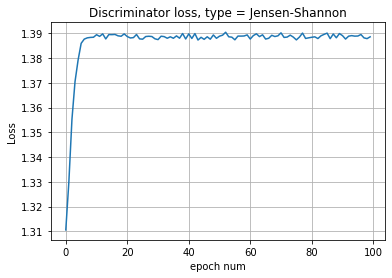

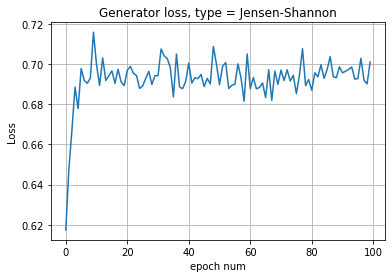

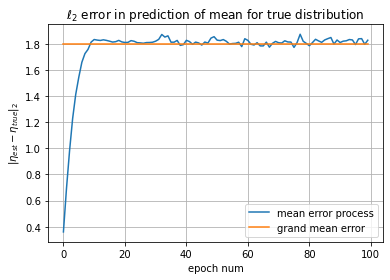

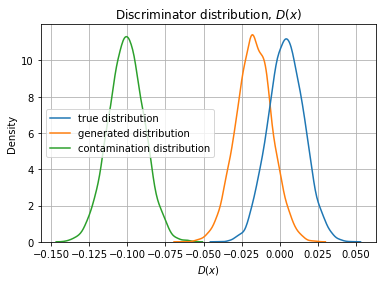

In [16]:
f.report_results()

In [17]:
f.report_results(figsize = (7, 4),
                 show_plots=False,
                 save_d_loss='d_loss_dim_1_js_best_init_big_contam.pdf',
                 save_g_loss='g_loss_dim_1_js_best_init_big_contam.pdf',
                 save_error='error_dim_1_js_best_init_big_contam.pdf',
                 save_distribution='discriminator_distr_dim_1_js_best_init_big_contam.pdf'
                 )

Avg error: 1.8192, Last error: 1.8268
True mean = 1.0000
Contamination mean = 10.0000
Result mean = 2.8268
Grand mean = 2.8000


# Optimization of JS-GAN for small difference between true distribution and contamination set, initialization $\eta_{init} = \eta_{true}$

In [495]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = fgan(p=1, eps=0.2, device=device, tol=1e-5)
cont_mean=1.5
f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
            true_mean=1.0,
            cont_mean=cont_mean, cont_var=1.)
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
f.data_init(train_size=50000, batch_size=500)
init_weights = False
init_eta = f.true_mean
f.net_init(d_hidden_units=[], 
           use_logistic_regression=True,
           init_weights=init_weights,
           init_eta=init_eta,
           use_median_init_G=True,
           elliptical=False, 
           g_input_dim=10, g_hidden_units=[10, 10],
           activation_D1='Sigmoid', verbose=True)
f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
f.fit(floss='js', epochs=100, avg_epochs=25, verbose=50)

Initialize Mean Error: 0.0974
Epoch:50, LossD/G:1.3878/0.6937, Error(Mean):0.1098
Epoch:100, LossD/G:1.3881/0.6978, Error(Mean):0.1045


Avg error: 0.1038, Last error: 0.1045
True mean = 1.0000
Contamination mean = 1.5000
Result mean = 1.1045
Grand mean = 1.1000


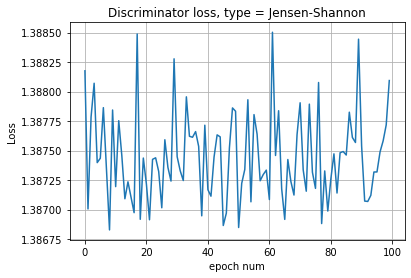

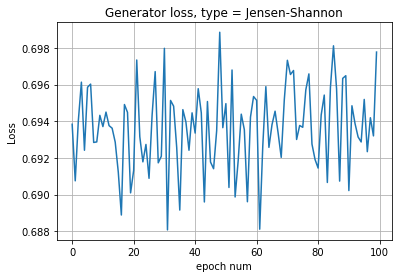

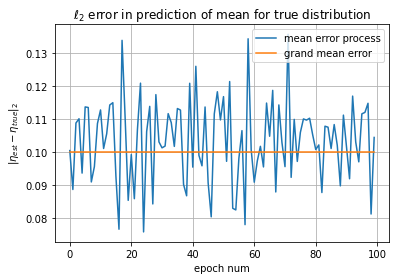

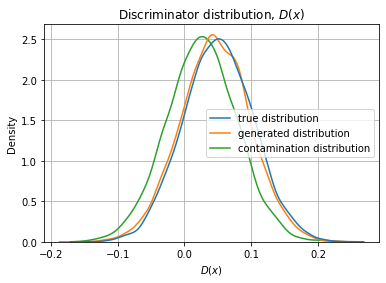

In [496]:
f.report_results()

In [497]:
f.report_results(figsize = (7, 4),
                 show_plots=False,
                 save_d_loss='d_loss_dim_1_js_best_init_small_contam.pdf',
                 save_g_loss='g_loss_dim_1_js_best_init_small_contam.pdf',
                 save_error='error_dim_1_js_best_init_small_contam.pdf',
                 save_distribution='discriminator_distr_dim_1_js_best_init_small_contam.pdf'
                 )

Avg error: 0.1038, Last error: 0.1045
True mean = 1.0000
Contamination mean = 1.5000
Result mean = 1.1045
Grand mean = 1.1000


# Optimization of JS-GAN with 1 hidden layer for big difference between true distribution and contamination set, initialization $\eta_{init} = \eta_{true}$

In [500]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = fgan(p=1, eps=0.2, device=device, tol=1e-5)
cont_mean=10.0
f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
            true_mean=1.0,
            cont_mean=cont_mean, cont_var=1.)
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
f.data_init(train_size=50000, batch_size=500)
init_weights = None
init_eta = f.true_mean
f.net_init(d_hidden_units=[20], 
           use_logistic_regression=False,
           init_weights=init_weights,
           init_eta=init_eta,
           use_median_init_G=True,
           elliptical=False, 
           g_input_dim=10, g_hidden_units=[10, 10],
           activation_D1='Sigmoid', verbose=True)
f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
f.fit(floss='js', epochs=100, avg_epochs=25, verbose=50)

Initialize Mean Error: 0.3266
Epoch:50, LossD/G:1.2363/0.5873, Error(Mean):0.0003
Epoch:100, LossD/G:1.2360/0.5858, Error(Mean):0.0160


Avg error: 0.0006, Last error: 0.0160
True mean = 1.0000
Contamination mean = 10.0000
Result mean = 1.0160
Grand mean = 2.8000


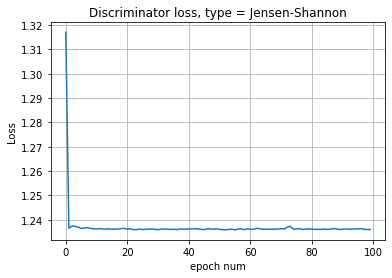

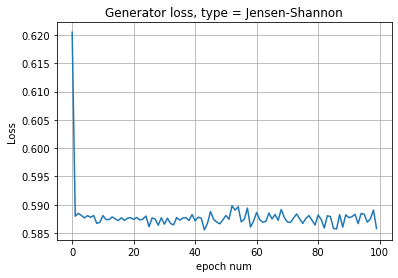

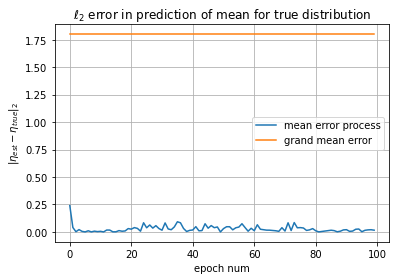

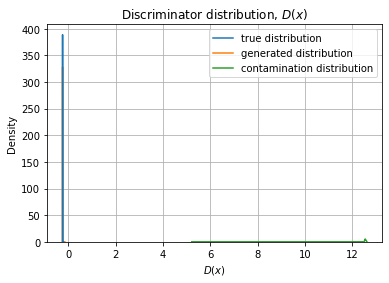

In [501]:
f.report_results()

In [503]:
f.report_results(figsize = (7, 4),
                 show_plots=False,
                 save_d_loss='d_loss_dim_1_js_1_hidden_best_init_big_contam.pdf',
                 save_g_loss='g_loss_dim_1_js_1_hidden_best_init_big_contam.pdf',
                 save_error='error_dim_1_js_1_hidden_best_init_big_contam.pdf',
                 save_distribution='discriminator_distr_dim_1_js_1_hidden_best_init_big_contam.pdf'
                 )

Avg error: 0.0006, Last error: 0.0160
True mean = 1.0000
Contamination mean = 10.0000
Result mean = 1.0160
Grand mean = 2.8000


# Comparison for JS-GANs with logistic regression and 1 hidden layer

In [513]:
t_arr = np.linspace(1.5, 15., num = 20)
eps = 0.2
true_mean = 1.0
result_mean_arr_log_regr =  []
result_mean_arr_1_hidden =  []
for t in t_arr:
    print("------")
    print(f"Contamination mean = {t}")
    print(f"Grand mean = {t*eps + (1 - eps)*true_mean}")
    print("Train discriminator with logistic regression")
    f = fgan(p=1, eps=eps, device=device, tol=1e-5)
    cont_mean=t
    f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
                true_mean=true_mean,
                cont_mean=cont_mean, cont_var=1.)
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    f.data_init(train_size=50000, batch_size=500)
    init_weights = None
    init_eta = f.true_mean
    f.net_init(d_hidden_units=[20], 
               use_logistic_regression=True,
               init_weights=init_weights,
               init_eta=init_eta,
               use_median_init_G=True,
               elliptical=False, 
               g_input_dim=10, g_hidden_units=[10, 10],
               activation_D1='Sigmoid', verbose=True)
    f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
    f.fit(floss='js', epochs=100, avg_epochs=25, verbose=50)
    result_mean = f.netG.bias.data.item()
    print(f"result_mean = {result_mean}")
    result_mean_arr_log_regr.append(result_mean)
    print("Train discriminator with 1 hidden layer")
    f = fgan(p=1, eps=eps, device=device, tol=1e-5)
    cont_mean=t
    f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
                true_mean=true_mean,
                cont_mean=cont_mean, cont_var=1.)
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    f.data_init(train_size=50000, batch_size=500)
    init_weights = None
    init_eta = f.true_mean
    f.net_init(d_hidden_units=[20], 
               use_logistic_regression=False,
               init_weights=init_weights,
               init_eta=init_eta,
               use_median_init_G=True,
               elliptical=False, 
               g_input_dim=10, g_hidden_units=[10, 10],
               activation_D1='Sigmoid', verbose=True)
    f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
    f.fit(floss='js', epochs=100, avg_epochs=25, verbose=50)
    result_mean = f.netG.bias.data.item()
    print(f"result_mean = {result_mean}")
    result_mean_arr_1_hidden.append(result_mean)

------
Contamination mean = 1.5
Grand mean = 1.1
Train discriminator with logistic regression
Initialize Mean Error: 0.0974
Epoch:50, LossD/G:1.3871/0.6964, Error(Mean):0.1095
Epoch:100, LossD/G:1.3871/0.6962, Error(Mean):0.1090
result_mean = 1.1089532375335693
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.0974
Epoch:50, LossD/G:1.3863/0.6958, Error(Mean):0.1546
Epoch:100, LossD/G:1.3863/0.6914, Error(Mean):0.1000
result_mean = 1.0999902486801147
------
Contamination mean = 2.2105263157894735
Grand mean = 1.2421052631578948
Train discriminator with logistic regression
Initialize Mean Error: 0.2190
Epoch:50, LossD/G:1.3871/0.6975, Error(Mean):0.2524
Epoch:100, LossD/G:1.3870/0.6961, Error(Mean):0.2527
result_mean = 1.2526689767837524
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.2190
Epoch:50, LossD/G:1.3808/0.6899, Error(Mean):0.2565
Epoch:100, LossD/G:1.3805/0.6933, Error(Mean):0.2281
result_mean = 1.228097677230835
------
Contamination mean = 2.9

Epoch:50, LossD/G:1.2362/0.5878, Error(Mean):0.0733
Epoch:100, LossD/G:1.2360/0.5858, Error(Mean):0.0150
result_mean = 1.015028715133667
------
Contamination mean = 13.578947368421053
Grand mean = 3.515789473684211
Train discriminator with logistic regression
Initialize Mean Error: 0.3266
Epoch:50, LossD/G:1.3872/0.7019, Error(Mean):2.5570
Epoch:100, LossD/G:1.3895/0.7021, Error(Mean):2.5842
result_mean = 3.584202527999878
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.3266
Epoch:50, LossD/G:1.2361/0.5873, Error(Mean):0.0270
Epoch:100, LossD/G:1.2360/0.5858, Error(Mean):0.0106
result_mean = 0.9893865585327148
------
Contamination mean = 14.289473684210526
Grand mean = 3.6578947368421053
Train discriminator with logistic regression
Initialize Mean Error: 0.3266
Epoch:50, LossD/G:1.3873/0.7021, Error(Mean):2.7007
Epoch:100, LossD/G:1.3899/0.7028, Error(Mean):2.7355
result_mean = 3.7355449199676514
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.3266
Epo

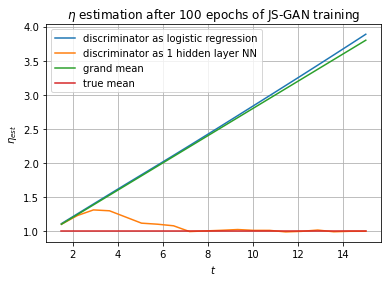

In [516]:
figsize = (6, 4)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(t_arr, result_mean_arr_log_regr, label = 'discriminator as logistic regression')
ax.plot(t_arr, result_mean_arr_1_hidden, label = 'discriminator as 1 hidden layer NN')
ax.plot(t_arr, t_arr*eps + (1 - eps)*true_mean, label = 'grand mean')
ax.plot(t_arr, [true_mean for i in range(len(t_arr))], label = 'true mean')
ax.legend()
ax.grid(True)
ax.set_title(r'$\eta$ estimation after 100 epochs of JS-GAN training')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\eta_{est}$")

plt.savefig("comparison_of_log_regr_and_1_hid_jsgan.pdf")

plt.show()

In [539]:
t_arr = np.linspace(-20, 20., num = 50)
eps = 0.2
true_mean = 1.0
result_mean_arr_log_regr =  []
result_mean_arr_1_hidden =  []
for t in t_arr:
    print("------")
    print(f"Contamination mean = {t}")
    print(f"Grand mean = {t*eps + (1 - eps)*true_mean}")
    print("Train discriminator with logistic regression")
    f = fgan(p=1, eps=eps, device=device, tol=1e-5)
    cont_mean=t
    f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
                true_mean=true_mean,
                cont_mean=cont_mean, cont_var=1.)
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    f.data_init(train_size=50000, batch_size=500)
    init_weights = None
    init_eta = f.true_mean
    f.net_init(d_hidden_units=[20], 
               use_logistic_regression=True,
               init_weights=init_weights,
               init_eta=init_eta,
               use_median_init_G=True,
               elliptical=False, 
               g_input_dim=10, g_hidden_units=[10, 10],
               activation_D1='Sigmoid', verbose=True)
    f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
    f.fit(floss='tv', epochs=100, avg_epochs=25, verbose=50)
    result_mean = f.netG.bias.data.item()
    print(f"result_mean = {result_mean}")
    result_mean_arr_log_regr.append(result_mean)
    print("Train discriminator with 1 hidden layer")
    f = fgan(p=1, eps=eps, device=device, tol=1e-5)
    cont_mean=t
    f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
                true_mean=true_mean,
                cont_mean=cont_mean, cont_var=1.)
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    f.data_init(train_size=50000, batch_size=500)
    init_weights = None
    init_eta = f.true_mean
    f.net_init(d_hidden_units=[20], 
               use_logistic_regression=False,
               init_weights=init_weights,
               init_eta=init_eta,
               use_median_init_G=True,
               elliptical=False, 
               g_input_dim=10, g_hidden_units=[10, 10],
               activation_D1='Sigmoid', verbose=True)
    f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
    f.fit(floss='tv', epochs=100, avg_epochs=25, verbose=50)
    result_mean = f.netG.bias.data.item()
    print(f"result_mean = {result_mean}")
    result_mean_arr_1_hidden.append(result_mean)

------
Contamination mean = -20.0
Grand mean = -3.2
Train discriminator with logistic regression
Initialize Mean Error: 0.3176
Epoch:50, LossD/G:-0.2009/-0.0000, Error(Mean):0.0786
Epoch:100, LossD/G:-0.2009/-0.0000, Error(Mean):0.0829
result_mean = 0.9170723557472229
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.3176
Epoch:50, LossD/G:-0.2009/-0.0000, Error(Mean):0.5106
Epoch:100, LossD/G:-0.2009/-0.0000, Error(Mean):0.5176
result_mean = 0.48237282037734985
------
Contamination mean = -19.183673469387756
Grand mean = -3.036734693877551
Train discriminator with logistic regression
Initialize Mean Error: 0.3176
Epoch:50, LossD/G:-0.2009/-0.0000, Error(Mean):0.0806
Epoch:100, LossD/G:-0.2009/-0.0000, Error(Mean):0.0851
result_mean = 0.9149288535118103
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.3176
Epoch:50, LossD/G:-0.2009/-0.0000, Error(Mean):0.5086
Epoch:100, LossD/G:-0.2009/-0.0000, Error(Mean):0.5160
result_mean = 0.4840175211429596
------
Co

Epoch:50, LossD/G:-0.2007/-0.0001, Error(Mean):0.6219
Epoch:100, LossD/G:0.0000/-0.0000, Error(Mean):7.8374
result_mean = -6.837435245513916
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.3176
Epoch:50, LossD/G:-0.0000/-0.0000, Error(Mean):7.2721
Epoch:100, LossD/G:0.0000/-0.0000, Error(Mean):7.2785
result_mean = -6.278491973876953
------
Contamination mean = -6.122448979591837
Grand mean = -0.42448979591836755
Train discriminator with logistic regression
Initialize Mean Error: 0.3176
Epoch:50, LossD/G:0.0000/-0.0000, Error(Mean):6.6591
Epoch:100, LossD/G:0.0000/-0.0000, Error(Mean):6.6605
result_mean = -5.660543441772461
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.3176
Epoch:50, LossD/G:-0.0000/-0.0000, Error(Mean):5.9138
Epoch:100, LossD/G:-0.0000/-0.0000, Error(Mean):5.9138
result_mean = -4.913750648498535
------
Contamination mean = -5.3061224489795915
Grand mean = -0.2612244897959184
Train discriminator with logistic regression
Initialize Mea

Epoch:50, LossD/G:0.0000/0.0000, Error(Mean):4.4838
Epoch:100, LossD/G:0.0000/0.0000, Error(Mean):4.4838
result_mean = 5.483799457550049
------
Contamination mean = 6.938775510204081
Grand mean = 2.1877551020408164
Train discriminator with logistic regression
Initialize Mean Error: 0.3266
Epoch:50, LossD/G:-0.0000/-0.0000, Error(Mean):5.5166
Epoch:100, LossD/G:0.0000/-0.0000, Error(Mean):5.5278
result_mean = 6.527805328369141
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.3266
Epoch:50, LossD/G:-0.0000/-0.0000, Error(Mean):5.2262
Epoch:100, LossD/G:-0.0000/-0.0000, Error(Mean):5.2262
result_mean = 6.226203918457031
------
Contamination mean = 7.755102040816325
Grand mean = 2.351020408163265
Train discriminator with logistic regression
Initialize Mean Error: 0.3266
Epoch:50, LossD/G:-0.0000/-0.0000, Error(Mean):6.3330
Epoch:100, LossD/G:0.0000/-0.0000, Error(Mean):6.3458
result_mean = 7.345792293548584
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.32

Epoch:50, LossD/G:-0.2009/-0.0000, Error(Mean):0.8305
Epoch:100, LossD/G:-0.2009/-0.0000, Error(Mean):0.8488
result_mean = 1.8487523794174194
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.3266
Epoch:50, LossD/G:-0.2009/-0.0000, Error(Mean):0.4855
Epoch:100, LossD/G:-0.2009/-0.0000, Error(Mean):0.4864
result_mean = 1.4864239692687988


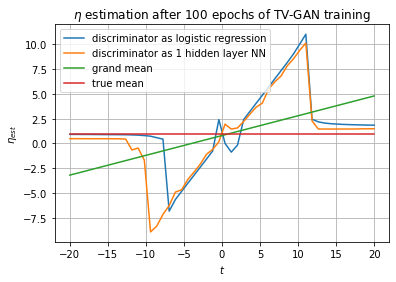

In [542]:
figsize = (6, 4)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(t_arr, result_mean_arr_log_regr, label = 'discriminator as logistic regression')
ax.plot(t_arr, result_mean_arr_1_hidden, label = 'discriminator as 1 hidden layer NN')
ax.plot(t_arr, t_arr*eps + (1 - eps)*true_mean, label = 'grand mean')
ax.plot(t_arr, [true_mean for i in range(len(t_arr))], label = 'true mean')
ax.legend()
ax.grid(True)
ax.set_title(r'$\eta$ estimation after 100 epochs of TV-GAN training')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\eta_{est}$")

plt.savefig("comparison_of_log_regr_and_1_hid_tvgan.pdf")

plt.show()

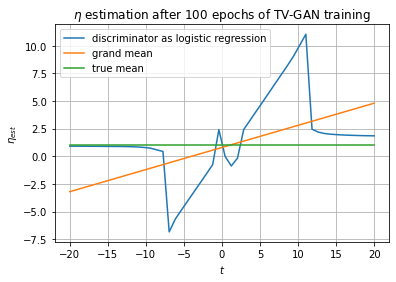

In [543]:
figsize = (6, 4)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(t_arr, result_mean_arr_log_regr, label = 'discriminator as logistic regression')
#ax.plot(t_arr, result_mean_arr_1_hidden, label = 'discriminator as 1 hidden layer NN')
ax.plot(t_arr, t_arr*eps + (1 - eps)*true_mean, label = 'grand mean')
ax.plot(t_arr, [true_mean for i in range(len(t_arr))], label = 'true mean')
ax.legend()
ax.grid(True)
ax.set_title(r'$\eta$ estimation after 100 epochs of TV-GAN training')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\eta_{est}$")

plt.savefig("comparison_of_log_regr.pdf")

plt.show()

# Bigger dimensionality for JS-GAN

In [45]:
t_arr = np.linspace(0., 10., num = 20)
p = 100
eps = 0.2
true_mean = 0.0
result_mean_arr_1_hidden =  []
result_w_norm_arr_1_hidden =  []

for t in t_arr:
    print("------")
    print(f"Contamination mean = {t}")
    print("Train discriminator with 1 hidden layer")
    f = fgan(p=p, eps=eps, device=device, tol=1e-5)
    cont_mean=t
    f.dist_init(true_type='Gaussian', cont_type='Gaussian', 
                true_mean=true_mean,
                cont_mean=cont_mean, cont_var=1.)
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    f.data_init(train_size=50000, batch_size=500)
    init_weights = None
    init_eta = f.true_mean
    f.net_init(d_hidden_units=[20], 
               use_logistic_regression=False,
               init_weights=init_weights,
               init_eta=init_eta,
               use_median_init_G=True,
               elliptical=False, 
               g_input_dim=10, g_hidden_units=[10, 10],
               activation_D1='Sigmoid', verbose=True)
    f.optimizer_init(lr_d=0.2, lr_g=0.02, d_steps=5, g_steps=1, type_opt='Adam')
    f.fit(floss='js', epochs=200, avg_epochs=25, verbose=50)
    result_mean_err = f.mean_err_record[-1]
    result_w_norm = torch.linalg.norm(f.netD.map_last.weight.data, ord=1).cpu().item()
    
    print(f"result l2 error = {result_mean_err}")
    print(f"result l1 norm of last layer weights = {result_w_norm}")
    result_mean_arr_1_hidden.append(result_mean_err)
    result_w_norm_arr_1_hidden.append(result_w_norm)

------
Contamination mean = 0.0
Train discriminator with 1 hidden layer
Initialize Mean Error: 0.0585
Epoch:50, LossD/G:1.3081/0.6366, Error(Mean):1.6783
Epoch:100, LossD/G:1.2768/0.6304, Error(Mean):2.4681
Epoch:150, LossD/G:1.3033/0.6323, Error(Mean):2.9787
Epoch:200, LossD/G:1.2573/0.6154, Error(Mean):3.2657
result l2 error = 3.265671491622925
result l1 norm of last layer weights = 1.0061712265014648
------
Contamination mean = 0.5263157894736842
Train discriminator with 1 hidden layer
Initialize Mean Error: 1.0384
Epoch:50, LossD/G:1.1907/0.5797, Error(Mean):1.5973
Epoch:100, LossD/G:1.1663/0.6273, Error(Mean):2.2362
Epoch:150, LossD/G:1.2597/0.5873, Error(Mean):1.0161
Epoch:200, LossD/G:1.2446/0.5918, Error(Mean):1.0633
result l2 error = 1.0632518529891968
result l1 norm of last layer weights = 5.827784538269043
------
Contamination mean = 1.0526315789473684
Train discriminator with 1 hidden layer
Initialize Mean Error: 1.9376
Epoch:50, LossD/G:1.1800/0.5607, Error(Mean):1.4230
Ep

Epoch:150, LossD/G:1.1886/0.5392, Error(Mean):2.8672
Epoch:200, LossD/G:1.1655/0.5585, Error(Mean):3.3310
result l2 error = 3.3309848308563232
result l1 norm of last layer weights = 10.65394401550293


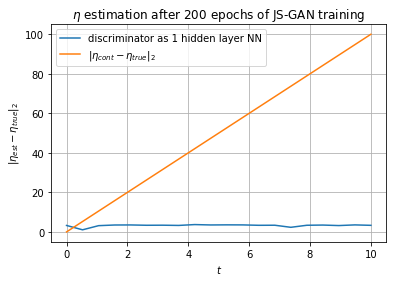

In [47]:
figsize = (6, 4)
fig, ax = plt.subplots(figsize=figsize)
#ax.plot(t_arr, result_mean_arr_log_regr, label = 'discriminator as logistic regression')
ax.plot(t_arr, result_mean_arr_1_hidden, label = 'discriminator as 1 hidden layer NN')
ax.plot(t_arr, (p**0.5)*t_arr, label = r'$\|\eta_{cont} - \eta_{true}\|_{2}$')
#ax.plot(t_arr, t_arr*eps + (1 - eps)*true_mean, label = 'grand mean')
#ax.plot(t_arr, [true_mean for i in range(len(t_arr))], label = 'true mean')
ax.legend()
ax.grid(True)
ax.set_title(r'$\eta$ estimation after 200 epochs of JS-GAN training')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\|\eta_{est} - \eta_{true}\|_{2}$")

plt.savefig("comparison_of_1_hid_layers_eta_error.pdf")

plt.show()

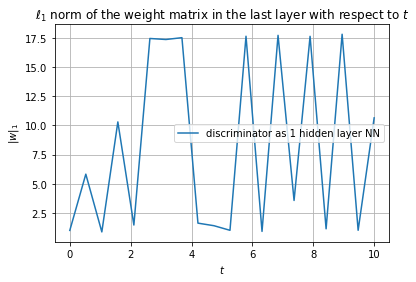

In [48]:
figsize = (6, 4)
fig, ax = plt.subplots(figsize=figsize)
#ax.plot(t_arr, result_mean_arr_log_regr, label = 'discriminator as logistic regression')
ax.plot(t_arr, result_w_norm_arr_1_hidden, label = 'discriminator as 1 hidden layer NN')
#ax.plot(t_arr, t_arr*eps + (1 - eps)*true_mean, label = 'grand mean')
#ax.plot(t_arr, [true_mean for i in range(len(t_arr))], label = 'true mean')
ax.legend()
ax.grid(True)
ax.set_title(r'$\ell_{1}$ norm of the weight matrix in the last layer with respect to $t$')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\|w\|_{1}$")

plt.savefig("comparison_of_1_hid_layers_weights_last.pdf")

plt.show()